## Загрузка данных из файла

In [97]:
import pandas as pd
df = pd.read_csv("../static/csv/mobile phone price prediction.csv")

attributes = df.columns
for attribute in attributes:
    print(attribute)
    # Вывод первых 10 строк
print(df.head(10))

Unnamed: 0
Name
Rating
Spec_score
No_of_sim
Ram
Battery
Display
Camera
External_Memory
Android_version
Price
company
Inbuilt_memory
fast_charging
Screen_resolution
Processor
Processor_name
   Unnamed: 0                                  Name  Rating  Spec_score  \
0           0                 Samsung Galaxy F14 5G    4.65          68   
1           1                    Samsung Galaxy A11    4.20          63   
2           2                    Samsung Galaxy A13    4.30          75   
3           3                    Samsung Galaxy F23    4.10          73   
4           4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   
5           5                 Samsung Galaxy M13 5G    4.40          75   
6           6               Samsung Galaxy M21 2021    4.10          76   
7           7                    Samsung Galaxy A12    4.10          71   
8           8                 Samsung Galaxy A14 5G    4.05          75   
9           9                    Samsung Galaxy M13    4.50  

## Бизнес-цели
1. Классифицировать мобильные устройства по ценовым категориям (например, бюджетные, средний класс, флагманы).
2. Определить, какие характеристики мобильных устройств наиболее сильно влияют на их рейтинг.

## Подготовка данных.

In [48]:
import numpy as np

# Проверка на пропущенные значения
missing_data = df.isnull().sum()
print("Пропущенные данные по каждому столбцу:")
print(missing_data)

Пропущенные данные по каждому столбцу:
Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64


При проверке на шум можно заметить выброс в 75 оценке. Цена там запредельная.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.


                                   Name  Rating  Spec_score  \
0                 Samsung Galaxy F14 5G    4.65          68   
1                    Samsung Galaxy A11    4.20          63   
2                    Samsung Galaxy A13    4.30          75   
3                    Samsung Galaxy F23    4.10          73   
4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   
5                 Samsung Galaxy M13 5G    4.40          75   
6               Samsung Galaxy M21 2021    4.10          76   
7                    Samsung Galaxy A12    4.10          71   
8                 Samsung Galaxy A14 5G    4.05          75   
9                    Samsung Galaxy M13    4.50          75   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches  

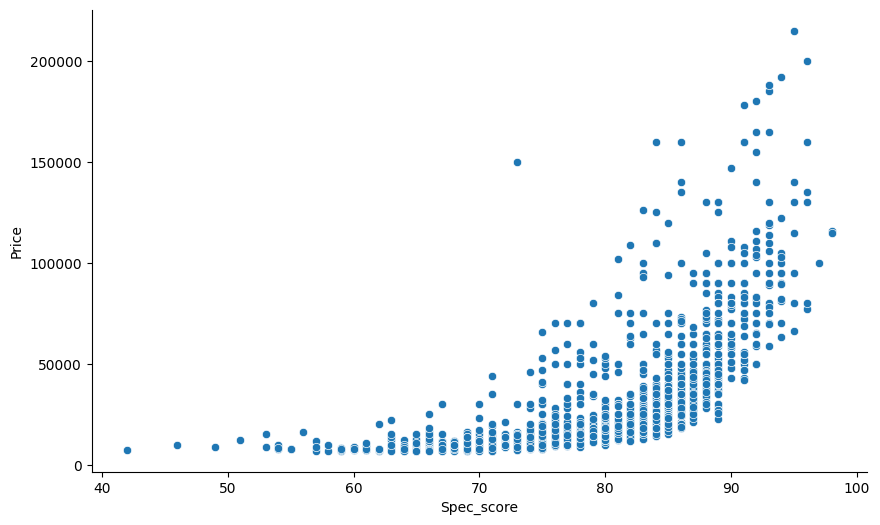

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Загрузка данных
df = pd.read_csv("../static/csv/mobile phone price prediction.csv",delimiter=',')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.describe(include='all')
f, ax = plt.subplots(figsize=(10,6))
sns.despine(f)
sns.scatterplot(data=df, x='Spec_score', y='Price')

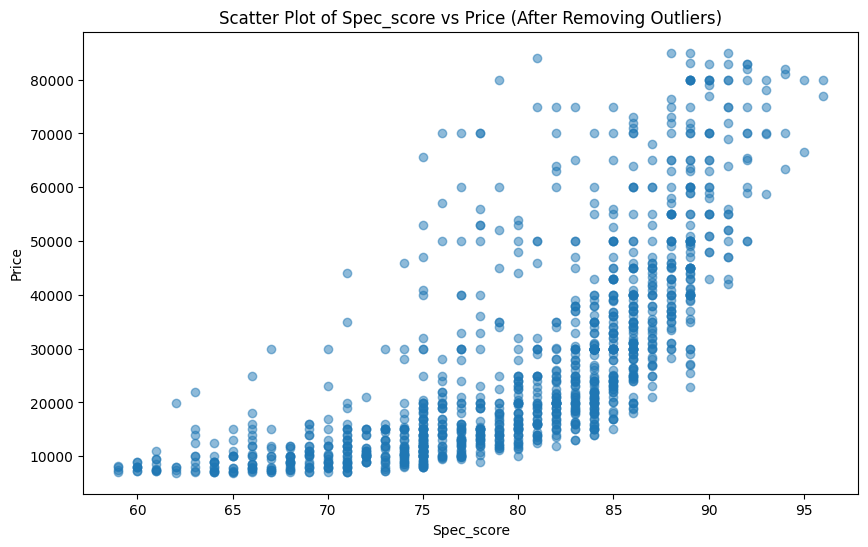

Количество строк до удаления выбросов: 1370
Количество строк после удаления выбросов: 1256


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

df['Spec_score'] = df['Spec_score'].astype(int)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
# Выбор столбцов для анализа
column1 = 'Spec_score'
column2 = 'Price'


# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Построение точечной диаграммы после удаления выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot of {column1} vs {column2} (After Removing Outliers)')
plt.show()

# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Теперь очистим датасет отпустых строк

In [52]:
df.dropna(inplace=True)

print(df.shape)

print(df.isnull().any())

(817, 18)
Unnamed: 0           False
Name                 False
Rating               False
Spec_score           False
No_of_sim            False
Ram                  False
Battery              False
Display              False
Camera               False
External_Memory      False
Android_version      False
Price                False
company              False
Inbuilt_memory       False
fast_charging        False
Screen_resolution    False
Processor            False
Processor_name       False
dtype: bool


## Разбиение данных на обучающую, контрольную и тестовую выборки.

Размеры выборок:
Обучающая выборка: 490 записей
Контрольная выборка: 163 записей
Тестовая выборка: 164 записей


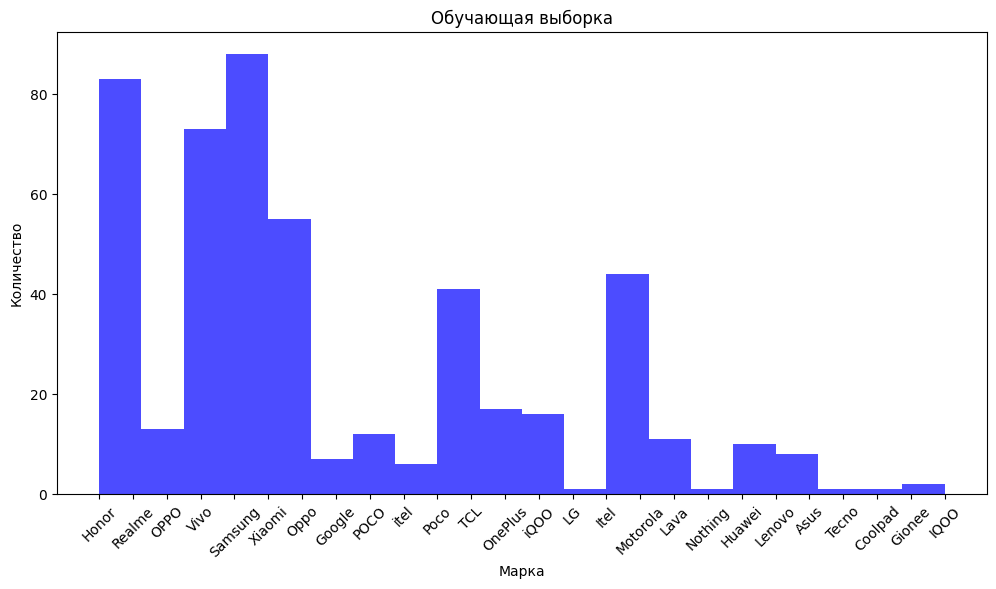

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['company'])  # Признаки (все столбцы, кроме 'сompany')
y = df['company']  # Целевая переменная (сompany)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Контрольная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Визуализация распределения марок в каждой выборке
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.xticks(rotation=45)  
plt.hist(y_train, bins=20, color='blue', alpha=0.7)
plt.title('Обучающая выборка')
plt.xlabel('Марка')
plt.ylabel('Количество')

plt.show()

Данные не сбалансированы, так как существует большая разница в количестве наблюдений для разных марок. Это может привести к тому, что модель будет хуже предсказывать цены для марок, численность которых  в выборке меньше, а для других - лучше. Применим методы приращения.

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

def check_balance(df, name):
    counts = df['company'].value_counts()
    print(f"Распределение company в {name}:")
    print(counts)
    print()

def oversample(df):
    X = df.drop('company', axis=1)
    y = df['company']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

def undersample(df):
    X = df.drop('company', axis=1)
    y = df['company']
    
    undersampler = RandomUnderSampler(random_state=42) # type: ignore
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")



Распределение company в обучающей выборке после oversampling:
company
POCO        82
Vivo        82
OPPO        82
LG          82
Realme      82
Motorola    82
Samsung     82
Xiaomi      82
Lava        82
itel        82
iQOO        82
Poco        82
Honor       82
OnePlus     82
Huawei      82
TCL         82
Google      82
Nothing     82
Asus        82
Coolpad     82
Itel        82
Oppo        82
Lenovo      82
IQOO        82
Gionee      82
Tecno       82
Name: count, dtype: int64

Распределение company в контрольной выборке после oversampling:
company
Motorola    37
Samsung     37
TCL         37
Poco        37
itel        37
Realme      37
Vivo        37
Xiaomi      37
Oppo        37
iQOO        37
OPPO        37
LG          37
POCO        37
Honor       37
OnePlus     37
Huawei      37
Lava        37
Google      37
Name: count, dtype: int64

Распределение company в тестовой выборке после oversampling:
company
Realme      30
Samsung     30
OPPO        30
TCL         30
Xiaomi      30


Данные были сбалансированы. Теперь можно перейти к конструированию признаков. Поставлены следующие задачи:
1. Классифицировать мобильные устройства по ценовым категориям (например, бюджетные, средний класс, флагманы).
2. Определить, какие характеристики мобильных устройств наиболее сильно влияют на их рейтинг.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


# Определение категориальных признаков
categorical_features = [
    'Rating', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor'
]

# Применение one-hot encoding к обучающей выборке
train_df_resampled_encoded = pd.get_dummies(train_df_undersampled, columns=categorical_features)

# Применение one-hot encoding к контрольной выборке
val_df_encoded = pd.get_dummies(val_df_undersampled, columns=categorical_features)

# Применение one-hot encoding к тестовой выборке
test_df_encoded = pd.get_dummies(test_df_undersampled, columns=categorical_features)

Дискретизация числовых признаков

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import re

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Извлечение числовых значений из столбца Battery
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df['Ram'] = df['Ram'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df['Camera'] = df['Camera'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Удаление запятых из столбца Price и преобразование в числовой формат
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Определение числовых признаков для дискретизации
numerical_features = ['Spec_score', 'Battery', 'Ram', 'Camera' ]

# Функция для дискретизации числовых признаков
def discretize_features(df, features, bins=5, labels=False):
    for feature in features:
        try:
            df[f'{feature}_bin'] = pd.cut(df[feature], bins=bins, labels=labels)
        except Exception as e:
            print(f"Ошибка при дискретизации признака {feature}: {e}")
    return df

# Применение дискретизации к обучающей, контрольной и тестовой выборкам
train_df_resampled = discretize_features(train_df_resampled, numerical_features)
val_df = discretize_features(val_df, numerical_features)
test_df = discretize_features(test_df, numerical_features)

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)


Размер обучающей выборки после балансировки: (5600, 22)
Размер контрольной выборки: (288, 22)
Размер тестовой выборки: (411, 22)
Unnamed: 0
Name
Rating
Spec_score
No_of_sim
Ram
Battery
Display
Camera
External_Memory
Android_version
Price
company
Inbuilt_memory
fast_charging
Screen_resolution
Processor
Processor_name


## Ручной синтез. Создание новых признаков на основе экспертных знаний и логики предметной области.

In [93]:
# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбцов Camera и Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

# Удаление запятых из столбца Price и преобразование в числовой формат
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Применение upsampling к обучающей выборке (если это необходимо)
X_train = train_df.drop('Price', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['Price']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Создание нового признака "Camera_to_Display_Ratio" на основе признаков "Camera" и "Display"
train_df_resampled['Camera_to_Display_Ratio'] = train_df_resampled['Camera'] / train_df_resampled['Display']
val_df['Camera_to_Display_Ratio'] = val_df['Camera'] / val_df['Display']
test_df['Camera_to_Display_Ratio'] = test_df['Camera'] / test_df['Display']

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки после балансировки: (5600, 19)
Размер контрольной выборки: (288, 19)
Размер тестовой выборки: (411, 19)


## Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Определение числовых признаков для масштабирования
numerical_features_to_scale = ['Spec_score', 'No_of_sim', 'Ram', 'Battery', 'Display', 'Camera', 'Inbuilt_memory', 'Screen_resolution', 'Camera_to_Display_Ratio']

# Удаление строковых значений из числовых признаков
for feature in numerical_features_to_scale:
    train_df_resampled[feature] = pd.to_numeric(train_df_resampled[feature], errors='coerce')
    val_df[feature] = pd.to_numeric(val_df[feature], errors='coerce')
    test_df[feature] = pd.to_numeric(test_df[feature], errors='coerce')

# Инициализация StandardScaler
scaler = StandardScaler()

# Масштабирование числовых признаков в обучающей выборке
train_df_resampled[numerical_features_to_scale] = scaler.fit_transform(train_df_resampled[numerical_features_to_scale])

# Масштабирование числовых признаков в контрольной и тестовой выборках
val_df[numerical_features_to_scale] = scaler.transform(val_df[numerical_features_to_scale])
test_df[numerical_features_to_scale] = scaler.transform(test_df[numerical_features_to_scale])

# Вывод размеров выборок
print("Размер обучающей выборки после балансировки:", train_df_resampled.shape)
print("Размер контрольной выборки:", val_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки после балансировки: (5600, 19)
Размер контрольной выборки: (288, 19)
Размер тестовой выборки: (411, 19)


c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Конструирование признаков с применением фреймворка Featuretools

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import featuretools as ft
import re

# Определение сущностей
es = ft.EntitySet(id='mobile_data')
es = es.add_dataframe(dataframe_name='train', dataframe=train_df, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='train', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Вывод первых нескольких строк для проверки
print("Обучающая выборка после конструирования признаков:")
print(feature_matrix.head())
print("Контрольная выборка после конструирования признаков:")
print(val_feature_matrix.head())
print("Тестовая выборка после конструирования признаков:")
print(test_feature_matrix.head())

Обучающая выборка после конструирования признаков:
    Unnamed: 0  Rating  Spec_score                      No_of_sim        Ram  \
id                                                                             
0          305    4.70          86  Dual Sim, 3G, 4G, 5G, VoLTE,   12 GB RAM   
1          941    4.45          71      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
2          800    4.20          68      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
3           97    4.25          69      Dual Sim, 3G, 4G, VoLTE,    4 GB RAM   
4         1339    4.30          74      Dual Sim, 3G, 4G, VoLTE,    6 GB RAM   

    Battery                     External_Memory Android_version    Price  \
id                                                                         
0      5000                         Android v12             NaN  30999.0   
1      5000    Memory Card Supported, upto 1 TB              12   6999.0   
2      5000               Memory Card Supported              12   8999.0   
3      5

c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individual

## Оценка качества

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import featuretools as ft
from sklearn.ensemble import RandomForestRegressor
import re


# Оценка важности признаков
X = feature_matrix
y = train_df_resampled['Price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
feature_names = feature_matrix.columns

# Сортировка признаков по важности
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
      feature  importance
4       Price    0.999443
2  Spec_score    0.000227
3     Battery    0.000146
0  Unnamed: 0    0.000146
1      Rating    0.000039


Размер обучающей выборки: 671
Размер контрольной выборки: 288
Размер тестовой выборки: 411


c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

Mean Squared Error: 53834536.21488374
R2 Score: 0.9445638071244045
Cross-validated Mean Squared Error: 311290473.964474


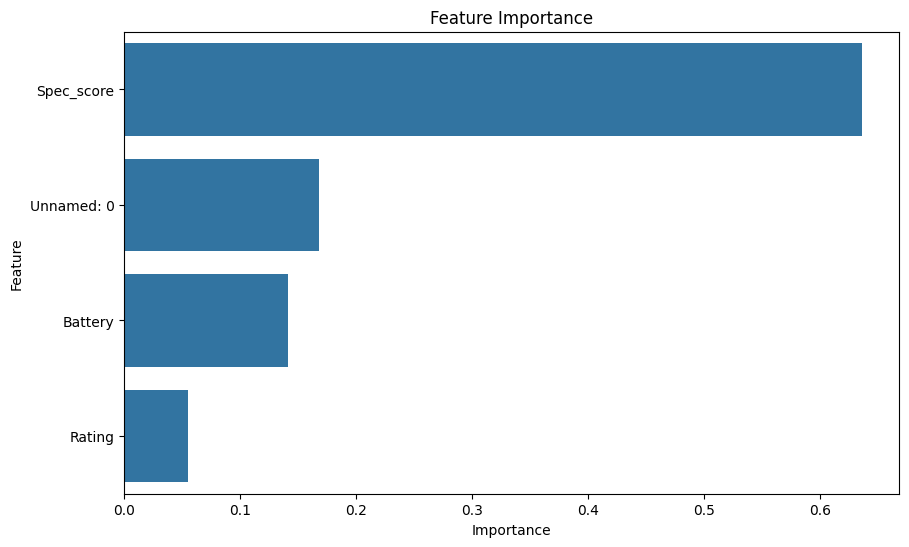

Train Mean Squared Error: 40281623.425488226
Train R2 Score: 0.9581963040734582


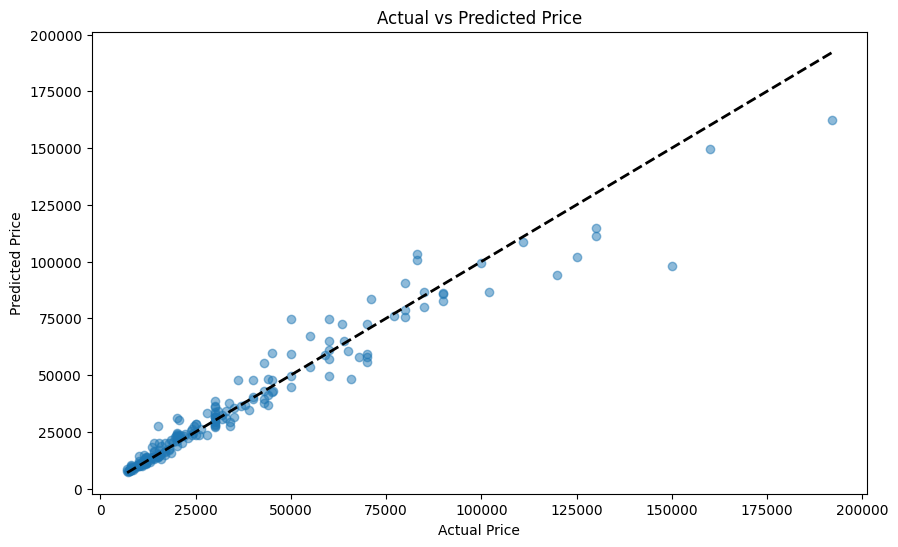

In [115]:
# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Преобразование столбца Battery в числовой формат
df['Battery'] = df['Battery'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Преобразование столбца Display в числовой формат
df['Camera'] = pd.to_numeric(df['Camera'], errors='coerce')
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df['Inbuilt_memory'] = pd.to_numeric(df['Inbuilt_memory'], errors='coerce')
df['fast_charging'] = pd.to_numeric(df['fast_charging'], errors='coerce')

# Удаление запятых из столбца Price и преобразование в числовой формат
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Удаление столбцов с текстовыми значениями, которые не могут быть преобразованы в числа
df = df.drop(columns=['Name', 'company', 'Android_version', 'Processor_name', 'External_Memory', 'No_of_sim', 'Ram', 'Screen_resolution', 'Processor'  ])
# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Определение сущностей
es = ft.EntitySet(id='mobile_data')
es = es.add_dataframe(dataframe_name='mobile', dataframe=train_df, index='id')

# Генерация признаков с уменьшенной глубиной
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='mobile', max_depth=1)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('Price', axis=1)
y_train = feature_matrix['Price']
X_val = val_feature_matrix.drop('Price', axis=1)
y_val = val_feature_matrix['Price']
X_test = test_feature_matrix.drop('Price', axis=1)
y_test = test_feature_matrix['Price']

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f"Cross-validated Mean Squared Error: {mse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R2 Score: {r2_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()